# Tutorial

Junjie Yu, Manchsster, 2024-03-10

Fisrt of all, we need to install Docker/Docker Desktop.

- [How to install Docker on Linux?](https://envdes.github.io/clmu-app/container/install_docker.html)
- [How to install Docker Desktop](https://www.docker.com/products/docker-desktop/)
  
Platform: arm64/amd64

## 0 Install pyclmuapp
if not install pyclmuapp

In [ ]:
! pip install pyclmuapp

## 1 Initialize pyclmuapp

- The inputfolder, outputfolder, logfolder, and scriptfolder will be checked in the current working directory.
- If the folder does not exist, it will be created.
- User can specify the folders by using the inputfolder, outputfolder, logfolder, and scriptfolder parameters.
- Inputfolder, outputfolder, logfolder, and scriptfolder parameters are optional.

In [1]:
from pyclmuapp import container as c
import os

o = c.clumapp(
    pwd=os.getcwd(),)

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.


## 2 Pull and run the clmu-app image

check what image will be used

In [28]:
o.image_name # do not change this if not necessary

'envdes/clmu-app:1.0'

pull envdes/clmu-app:1.0 to local

In [27]:
o.docker(cmd="pull",
         cmdlogfile="None",) # This will pull the image from the docker hub
# other parameters are available, see the Python API documentation

1.0: Pulling from envdes/clmu-app
bb93aca2282a: Pulling fs layer
582d363feaed: Pulling fs layer
1a484759dca9: Pulling fs layer
81331aae7754: Pulling fs layer
980d15f7476f: Pulling fs layer
0d4d347baaeb: Pulling fs layer
71331a603772: Pulling fs layer
4f4fb700ef54: Pulling fs layer
81331aae7754: Waiting
980d15f7476f: Waiting
0d4d347baaeb: Waiting
8e64d824246d: Pulling fs layer
03f446ddd32d: Pulling fs layer
4f4fb700ef54: Waiting
71331a603772: Waiting
8e64d824246d: Waiting
03f446ddd32d: Waiting
582d363feaed: Verifying Checksum
582d363feaed: Download complete
1a484759dca9: Verifying Checksum
1a484759dca9: Download complete
980d15f7476f: Verifying Checksum
980d15f7476f: Download complete
bb93aca2282a: Verifying Checksum
bb93aca2282a: Download complete
bb93aca2282a: Pull complete
582d363feaed: Pull complete
1a484759dca9: Pull complete
71331a603772: Verifying Checksum
71331a603772: Download complete
4f4fb700ef54: Verifying Checksum
4f4fb700ef54: Download complete
8e64d824246d: Verifying Chec

**run a container**

check what container name will be used

In [2]:
o.container_name # do not change this if not necessary

'myclmu'

run a container using o.image_name and o.container_name

In [2]:
o.docker(cmd="run",
         cmdlogfile="None",)

3e84d7a65f29e97608b5e6d90168c85c3797aa62df841121b5a96614ef395561



**folder and container**

after running a container (clmu) using `o.docker`, the floders will be binded to container

if you get the input data, bind them when initializing the `c.clumapp`.

<img src="./fig/folder.png" alt="Folder and container" width="500">

## 3 check the default case configuration and revise
we use the single point case [***PTS model***](https://escomp.github.io/ctsm-docs/versions/master/html/users_guide/running-single-points/running-pts_mode-configurations.html) as the default case. The default case with the following configuration:

In [2]:
o.caseconfig

{'case_name': 'Manchester',
 'resolution': 'f09_g17',
 'compset': '2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV',
 'case_lat': '53.246',
 'case_lon': '-2.5',
 'RUN_STARTDATE': '2008-08-08',
 'DATM_CLMNCEP_YR_START': '2008',
 'DATM_CLMNCEP_YR_END': '2008',
 'STOP_OPTION': 'ndays',
 'case_length': '10',
 'hist_avgflag_pertape': 'A',
 'hist_nhtfrq': '-1',
 'hist_mfilt': '240',
 'output_murban': 'True',
 'mu_urban': "'TSA'"}

**How to revise the config?**

o.caseconfig['\*\*'] = "\*\*"

Note: all the config must be string

In [2]:
o.caseconfig['case_length'] = "20"
o.caseconfig['hist_mfilt'] = "500"
o.caseconfig

{'case_name': 'Manchester',
 'resolution': 'f09_g17',
 'compset': '2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV',
 'case_lat': '53.246',
 'case_lon': '-2.5',
 'RUN_STARTDATE': '2008-08-08',
 'DATM_CLMNCEP_YR_START': '2008',
 'DATM_CLMNCEP_YR_END': '2008',
 'STOP_OPTION': 'ndays',
 'case_length': '20',
 'hist_avgflag_pertape': 'A',
 'hist_nhtfrq': '-1',
 'hist_mfilt': '500',
 'output_murban': 'True',
 'mu_urban': "'TSA'"}

- Change the year of the caseconfig?
  - --> o.caseconfig['year'] = "2009"
- "output_murban" is a required parameter, 
  - when is "True", the output will be saved muti-urban class.
  - when is "False", the output will be saved single-urban class,and use the default output.
- "'mu_urban' can define other urban variables
    refer: [output names](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/setting-up-and-running-a-case/master_list_file.html)

To learn more? --> [CTSM docs](https://escomp.github.io/ctsm-docs/versions/master/html/users_guide/index.html).

## 4 run a case with o.caseconfig

the ouput file name will be return after `o.work()`

***Note!***: the first time you run it, you need to download a lot of input data, which will consume a lot of time. This data is downloaded automatically according to the config. 

In [3]:
original = o.work(iflog=True) # This will run the case and return the log 
original


Did not find an alias or longname compset match for 2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV 
Compset forcing is 1972-2004
ATM component is  Data driven ATM  CLM CRU NCEP v7 data set 
LND component is clm5.0:Satellite phenology:
ICE component is Stub ice component
OCN component is Stub ocn component
ROF component is Stub river component
GLC component is Stub glacier (land ice) component
WAV component is Stub wave component
ESP component is 
Pes     specification file is /p/project/clm5.0/cime/../cime_config/config_pes.xml
Machine is clmu-app
Pes setting: grid match    is l%0.9x1.25 
Pes setting: grid          is a%0.9x1.25_l%0.9x1.25_oi%null_r%null_g%null_w%null_m%gx1v7 
Pes setting: compset       is 2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV 
Pes setting: tasks       is {'NTASKS_ATM': -4, 'NTASKS_LND': -4, 'NTASKS_ROF': -4, 'NTASKS_ICE': -4, 'NTASKS_OCN': -4, 'NTASKS_GLC': -4, 'NTASKS_WAV': -4, 'NTASKS_CPL': -4} 
Pes setting: threads     is {'NTHRDS_ATM': 1, 'NTHRDS_L

['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/Manchester_hist0_2024-03-10_14-27-47_clm.nc']

Now, let's check output.

In [5]:
ds0 = o.nc_view()
ds0

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 481,
                         hist_interval: 2, lon: 1, lat: 1, column: 12,
                         gridcell: 1, landunit: 4, pft: 14)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) object 2008-08-08 00:00:00 ... 2008-08-28 00:0...
  * lon                 (lon) float32 357.5
  * lat                 (lat) float32 53.25
Dimensions without coordinates: hist_interval, column, gridcell, landunit, pft
Data variables: (12/53)
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    ...                  ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    TSA                 (time, landunit) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/10/24 14:27:43
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1

## 5 Change the surface data

fsurdat will be read when run o.work()

In [6]:
o.caseconfig

{'case_name': 'Manchester',
 'resolution': 'f09_g17',
 'compset': '2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV',
 'case_lat': '53.246',
 'case_lon': '-2.5',
 'RUN_STARTDATE': '2008-08-08',
 'DATM_CLMNCEP_YR_START': '2008',
 'DATM_CLMNCEP_YR_END': '2008',
 'STOP_OPTION': 'ndays',
 'case_length': '20',
 'hist_avgflag_pertape': 'A',
 'hist_nhtfrq': '-1',
 'hist_mfilt': '500',
 'output_murban': 'True',
 'mu_urban': "'TSA'",
 'fsurdat': '/p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc',
 'local_fsurdat': '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc'}

use `o.modify_surf()` to modify the surface

what **var** is available in the surface? 

| Variable | Long name | Units | Category| 
|---|---|---|---|
|ALB_ROOF_DIR|albedo of roof |unitless| radiative|
|ALB_WALL_DIR|albedo of wall | unitless| radiative|
|ALB_IMPROAD_DIR| albedo of impervious road | unitless| radiative|
|ALB_ROOF_DIF|albedo of roof |unitless| radiative|
|ALB_WAL_DIF|albedo of wall | unitless| radiative|
|ALB_IMPROAD_DIF| albedo of impervious road | unitless| radiative|
|EM_ROOF|albedo of roof |unitless| radiative|
|EM_WALL|albedo of wall | unitless| radiative|
|EM_IMPROAD| albedo of impervious road | unitless| radiative|
|CANYON_HWR|canyon height to width ratio| unitless| morphological|
|HT_ROOF|height of roof|meters|morphological|
|THICK_ROOF|thickness of roof|meters|morphological|
|THICK_WALL|thickness of roof|meters|morphological|
|TK_ROOF|thermal conductivity of roof|W/m*K|thermal|
|TK_WALL|thermal conductivity of wall|W/m*K|thermal|
|TK_IMPROAD|thermal conductivity of impervious road|W/m*K|thermal|
|CV_ROOF|volumetric heat capacity of roof|J/m^3*K|thermal|
|CV_WALL|volumetric heat capacity of wall|J/m^3*K|thermal|
|CV_IMPROAD|volumetric heat capacity of impervious road|J/m^3*K|thermal|

In [7]:
o.modify_surf(var="ALB_ROOF_DIR", action=0.2) # Check the Python API documentation for more details on the parameters

The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.


{'case_name': 'Manchester',
 'resolution': 'f09_g17',
 'compset': '2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV',
 'case_lat': '53.246',
 'case_lon': '-2.5',
 'RUN_STARTDATE': '2008-08-08',
 'DATM_CLMNCEP_YR_START': '2008',
 'DATM_CLMNCEP_YR_END': '2008',
 'STOP_OPTION': 'ndays',
 'case_length': '20',
 'hist_avgflag_pertape': 'A',
 'hist_nhtfrq': '-1',
 'hist_mfilt': '500',
 'output_murban': 'True',
 'mu_urban': "'TSA'",
 'fsurdat': '/p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc',
 'local_fsurdat': '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc',
 'local_fsurdat_org': '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc',
 'revise_fsurdat': 'True'}

In [10]:
o.work(iflog=False)

['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/Manchester_hist0_2024-03-10_14-28-26_clm.nc']

Note! Recover the original surface data

In [13]:
o.modify_surf(var="ALB_ROOF_DIR", action=-0.2)

The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.


{'case_name': 'Manchester',
 'resolution': 'f09_g17',
 'compset': '2000_DATM%CRUv7_CLM50%SP_SICE_SOCN_SROF_SGLC_SWAV',
 'case_lat': '53.246',
 'case_lon': '-2.5',
 'RUN_STARTDATE': '2008-08-08',
 'DATM_CLMNCEP_YR_START': '2008',
 'DATM_CLMNCEP_YR_END': '2008',
 'STOP_OPTION': 'ndays',
 'case_length': '20',
 'hist_avgflag_pertape': 'A',
 'hist_nhtfrq': '-1',
 'hist_mfilt': '500',
 'output_murban': 'True',
 'mu_urban': "'TSA'",
 'fsurdat': '/p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc',
 'local_fsurdat': '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc',
 'local_fsurdat_org': '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc',
 'revise_fsurdat': 'True'}

view the results

In [11]:
ds1 = o.nc_view()
ds1

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 481,
                         hist_interval: 2, lon: 1, lat: 1, column: 12,
                         gridcell: 1, landunit: 4, pft: 14)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) object 2008-08-08 00:00:00 ... 2008-08-28 00:0...
  * lon                 (lon) float32 357.5
  * lat                 (lat) float32 53.25
Dimensions without coordinates: hist_interval, column, gridcell, landunit, pft
Data variables: (12/53)
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    ...                  ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    TSA                 (time, landunit) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/10/24 14:28:23
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1

result plotting

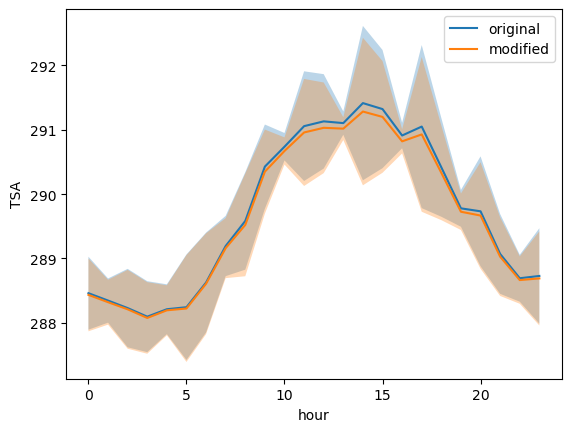

In [12]:
import matplotlib.pyplot as plt

def plot(ds, label=None):
    dd = ds['TSA'].assign_coords(landunit=ds['land1d_ityplunit']).sel(landunit=8).groupby('time.hour')
    mean = dd.mean('time')
    var = dd.var('time')

    plt.plot(mean, label=label)
    plt.fill_between(mean['hour'].values, mean - var, mean + var, alpha=0.3)

plot(ds0, label='original')
plot(ds1, label='modified')
plt.legend()
plt.xlabel('hour')
plt.ylabel('TSA')
plt.show()

**Results**

The cases of original and modified surface albedo are shown in the figure. The modified surface albedo is 0.2 lower than the original one. The modified surface albedo leads to a lower air temperature. Espacially, the air temperature is lower in the afternoon.

## 6 change the forcing data

This is a dirty method to change the forcing, as we will change the whole file.

Warning! **Backup** the file or recover the forcing file after case ran

### 6.1 Firtst, we need to check what forcing will be used in the simulation

[CLM5.0 User‘s Guide » 1.2. Setting Up and Running a Case](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/setting-up-and-running-a-case/customizing-the-datm-namelist.html)

The forcing file used in previous cases is in

inputfolder/atm/datm7/atm_forcing.datm7.cruncep_qianFill.0.5d.v7.c160715

Let's check.

In [14]:
os.listdir(o.input_path+"/atm/datm7/atm_forcing.datm7.cruncep_qianFill.0.5d.v7.c160715")

['Solar6Hrly',
 'domain.lnd.360x720_cruncep.130305.nc',
 'Precip6Hrly',
 'TPHWL6Hrly']

### 6.2 Change the Precip6Hrly

We will change the forcing in TPHWL6Hrly, lest check the original forcing first.

In [15]:
forcing = o.input_path+"/atm/datm7/atm_forcing.datm7.cruncep_qianFill.0.5d.v7.c160715" + \
         "/Precip6Hrly" + "/clmforc.cruncep.V7.c2016.0.5d.Prec.2008-08.nc"

f = o.nc_view(ds = forcing)
f

<xarray.Dataset>
Dimensions:   (time: 124, lat: 360, lon: 720, scalar: 1)
Coordinates:
  * time      (time) object 2008-08-01 03:00:00 ... 2008-08-31 21:00:00
Dimensions without coordinates: lat, lon, scalar
Data variables:
    LONGXY    (lat, lon) float32 ...
    LATIXY    (lat, lon) float32 ...
    EDGEE     (scalar) float32 ...
    EDGEW     (scalar) float32 ...
    EDGES     (scalar) float32 ...
    EDGEN     (scalar) float32 ...
    PRECTmms  (time, lat, lon) float32 ...
Attributes:
    case_title:  CRUNCEP 6-Hourly Atmospheric Forcing: Precipitation.  Missin...

change the PRECTmms by adding 10 mm, see what happens

In [16]:
o.modify_forcing(var="PRECTmms", action=10, forcing_location=forcing)

In [17]:
forcing_revised = o.work(iflog=False)
df = o.nc_view(ds = forcing_revised[0])
# recover the original forcing
o.modify_forcing(var="PRECTmms", action=-10, forcing_location=forcing)
df

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 481,
                         hist_interval: 2, lon: 1, lat: 1, column: 12,
                         gridcell: 1, landunit: 4, pft: 14)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) object 2008-08-08 00:00:00 ... 2008-08-28 00:0...
  * lon                 (lon) float32 357.5
  * lat                 (lat) float32 53.25
Dimensions without coordinates: hist_interval, column, gridcell, landunit, pft
Data variables: (12/53)
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    ...                  ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    TSA                 (time, landunit) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/10/24 14:33:22
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1

In [18]:
o.modify_surf(var="ALB_ROOF_DIR", action=0.2)
o.modify_forcing(var="PRECTmms", action=10, forcing_location=forcing)
surf_focring_revised = o.work(iflog=False)
o.modify_surf(var="ALB_ROOF_DIR", action=-0.2)
o.modify_forcing(var="PRECTmms", action=-10, forcing_location=forcing)
dsf = o.nc_view(ds = surf_focring_revised[0])

The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.


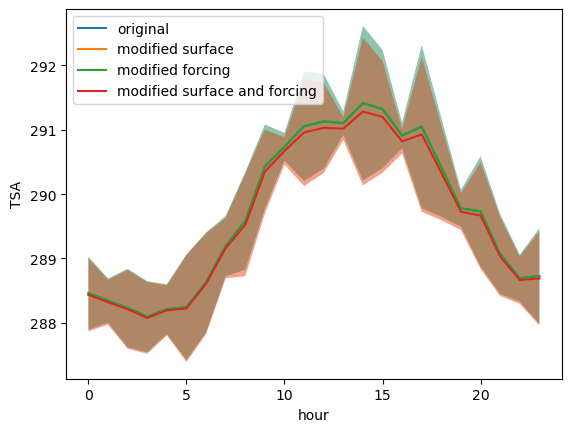

In [24]:
import matplotlib.pyplot as plt

def plot(ds, label=None):
    dd = ds['TSA'].assign_coords(landunit=ds['land1d_ityplunit']).sel(landunit=8).groupby('time.hour')
    mean = dd.mean('time')
    var = dd.var('time')

    plt.plot(mean, label=label)
    plt.fill_between(mean['hour'].values, mean - var, mean + var, alpha=0.3)

plot(ds0, label='original')
plot(ds1, label='modified surface')
plot(df, label='modified forcing')
plot(dsf, label='modified surface and forcing')
     
plt.legend()
plt.xlabel('hour')
plt.ylabel('TSA')
plt.show()

Result: no significant change in the TSA

### 6.3 modify the surface and TBOT at the same time

In [25]:
forcing = o.input_path+"/atm/datm7/atm_forcing.datm7.cruncep_qianFill.0.5d.v7.c160715" + \
         "/TPHWL6Hrly" + "/clmforc.cruncep.V7.c2016.0.5d.TPQWL.2008-08.nc"

o.modify_forcing(var="TBOT", action=1.5, forcing_location=forcing)
forcing_revised = o.work(iflog=False)
df = o.nc_view(ds = forcing_revised[0])
o.modify_surf(var="ALB_ROOF_DIR", action=0.2)
surf_focring_revised = o.work(iflog=False)
o.modify_surf(var="ALB_ROOF_DIR", action=-0.2)
o.modify_forcing(var="TBOT", action=1.5, forcing_location=forcing)
dsf = o.nc_view(ds = surf_focring_revised[0])

The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified.nc.


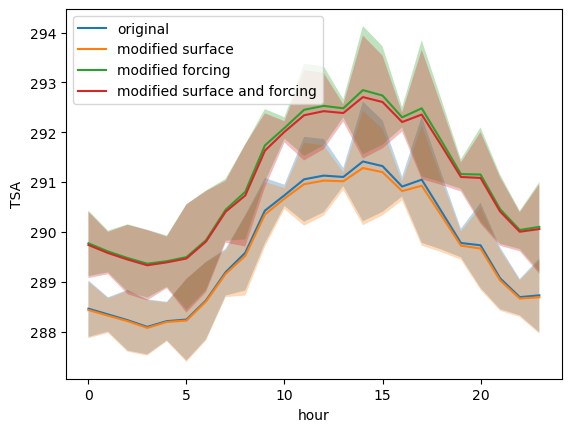

In [28]:
import matplotlib.pyplot as plt

def plot(ds, label=None):
    dd = ds['TSA'].assign_coords(landunit=ds['land1d_ityplunit']).sel(landunit=8).groupby('time.hour')
    mean = dd.mean('time')
    var = dd.var('time')

    plt.plot(mean, label=label)
    plt.fill_between(mean['hour'].values, mean - var, mean + var, alpha=0.3)

plot(ds0, label='original')
plot(ds1, label='modified surface')
plot(df, label='modified forcing')
plot(dsf, label='modified surface and forcing')
     
plt.legend()
plt.xlabel('hour')
plt.ylabel('TSA')
plt.show()

Result: no significant change in the TSA

## 7 Additional examples

Run your own case

1. write a case scripts
2. use o.docker()
3. the raw results will be at "logfolder/casename"

In [ ]:
# assume the user has a clm script.sh
from pyclmuapp import container as c

with open("script.sh", "r") as f:
    script = f.read()

o = c.clumapp(
    pwd=os.getcwd(),)

# make the container as 2

o.docker(cmd="chomd", script=script, iflog=False)
# use the "file.log" to record the log
o.docker(cmd="run", cmdlogfile="file.log", iflog=True, dockersript=script)